## **How a waiting time model leads to the Poisson and exponential distributions**


In the previous lesson, we discussed that the assumptions behind exponentially distributed waiting times are–

- Events occur at a fixed average rate which does not change during the simulation.

- Events are independent so past events do not influence future events.

In this notebook, we implement a simulation to confirm/demonstrate how a Poisson distribution over the number of events per time interval and an exponential distribution over the waiting time between consecutive events arise from these assumptions.

### **Outline**
The basic idea behind the theoretical proof also gives us a framework for implementing the simulation to check the theoretical results. The theoretical proof isn't reproduced in detail here, but you can find an outline of the proof here.

In the theoretical proof, we assume events occur with a fixed average rate of $mu$ events per unit interval.

- So, in an interval of length 1, we should observe $mu$ events on average.
- In an interval of length $\ell$, we should observe $\mu\ell$ events, on average.

If we take a unit interval and divide it into $n$ smaller sub-intervals of length $1/n$, the average number of events per sub-interval is $\mu/n$. Now we make a theoretical move: if the sub-intervals are small enough (technically, as $n\rightarrow\infty$), the probability of observing more than 1 event per sub-interval goes to 0. So, we need to analyze only two possibilities per sub-interval – either 1 event occurs or 0 events occur. Furthermore, the probability of observing 1 event in a sub-interval is $\mu/n$ since that is still the average number of events per sub-interval of length $1/n$.

Our question is now, how many times do we observe a positive outcome if we make $n$ observations (one per sub-interval) and the probability of one positive outcome is $\mu/n$.

Simulation of one interval
Let's simulate that. Please read all code comments below to follow along with how we put together the simulation.

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

np.random.seed(3501)

The result of simulating 20 sub-intervals of width 0.05 with an
average rate of 3.5 events in the whole unit interval and
0.175 events per sub-interval

Events:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]

We observe 3.0 events in total
The distances between consecutive events are: [0.35 0.05]


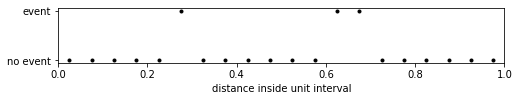

In [2]:
mu = 3.5
n = 20

p = mu / n

# How many events occur in one interval and what are the distances between
# consecutive events?
# For each of the n sub-intervals, generate a random value to check whether an
# event occurred with probability p, and store the result.

events_occurred = np.empty(n)  # Create an empty array with n slots
for i in range(n):
    events_occurred[i] = sts.uniform.rvs(loc=0, scale=1) < p

print(
    f'The result of simulating {n} sub-intervals of width {1/n} with an\n'
    f'average rate of {mu} events in the whole unit interval and\n'
    f'{mu/n} events per sub-interval\n')

print('Events:')
print(events_occurred)
print()

total_events = np.sum(events_occurred)
print(f'We observe {total_events} events in total')

distances = np.diff(np.nonzero(events_occurred)[0]) / n
print(f'The distances between consecutive events are: {distances}')

plt.figure(figsize=(8, 1))
plt.plot(np.arange(0.5, n+0.5)/n, events_occurred, 'k.')
plt.xlabel('distance inside unit interval')
plt.xlim(0, 1)
plt.yticks([0, 1], ['no event', 'event'])
plt.show()

We observe 5 events in total
The distances between consecutive events are: [0.48 0.07 0.04 0.27]


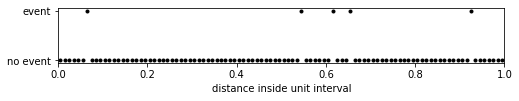

In [3]:
n = 100
p = mu / n

# In the previous cell, we generated events using a for-loop. Using NumPy, we
# can do this faster and with less code by generating n uniform random numbers
# in one line and comparing all of them to p.

# We now do this, to get the same results:

events_occurred = sts.uniform.rvs(loc=0, scale=1, size=n) < p

# Compute the total events and distances and plot the events

total_events = np.sum(events_occurred)
print(f'We observe {total_events} events in total')

distances = np.diff(np.nonzero(events_occurred)[0]) / n
print(f'The distances between consecutive events are: {distances}')

plt.figure(figsize=(8, 1))
plt.plot(np.arange(0.5, n+0.5)/n, events_occurred, 'k.')
plt.xlabel('distance inside unit interval')
plt.xlim(0, 1)
plt.yticks([0, 1], ['no event', 'event'])
plt.show()

In [4]:
n = 1000  # Number of sub-intervals
p = mu / n

# The more trials we run, the more accurate our results become since we average
# out the random effects.

number_of_trials = 10000

# We use the lists below to record all results from all 10,000 runs of the
# simulation. Note that we record 1 value for the number of events at the end
# of each trial but many values for the distances between these events.

total_events = []
distances = []

for trial in range(number_of_trials):
    events_occurred = sts.uniform.rvs(loc=0, scale=1, size=n) < p
    total_events.append(np.sum(events_occurred))
    distances.extend(np.diff(np.nonzero(events_occurred)[0]) / n)

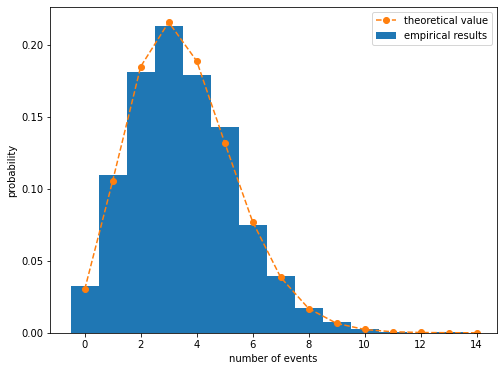

In [5]:
plt.figure(figsize=(8, 6))

# Plot a histogram of simulated event counts

plt.hist(
    total_events, bins=max(total_events), align='left', density=True,
    label='empirical results')

# Plot the theoretical distribution - Poisson with rate parameter mu

x = np.arange(0, max(total_events)+1)
plt.plot(x, sts.poisson.pmf(x, mu), 'o--', label='theoretical value')

plt.xlabel('number of events')
plt.ylabel('probability')
plt.legend()
plt.show()
